## Generative AI based Data Visualization

1. Load some data in pandas
2. User can ask questions in natural language form for visualization for same data from pandas
3. Convert natural language into sql and use that sql to extract data from pandas.
4. Based on data retrieved from pandas plot a chart/graph automatically.

In [1]:
import re

def find_conditions(text):
    # Regular expression pattern to find key-value pairs
    pattern = re.compile(r"(\w+) is ([\w\s><=]+?)(?:,|and|\.)")

    # Search for key-value pairs in the text
    matches = pattern.findall(text)

    # Create the dictionary based on extracted key-value pairs
    result = {}
    for key, value in matches:
        result[key.lower()] = value

    return result


def dict_to_sql(table, input_dict):
    sql_query = f'SELECT * FROM {table} WHERE '
    conditions = []
    for key, value in input_dict.items():
        if any(op in value for op in ['>', '<', '=']):
            conditions.append(f'{key} {value}')
        else:
            conditions.append(f'{key} = {value}')

    sql_query += ' AND '.join(conditions)
    return sql_query


In [2]:
# Test the function with example input text
input_texts = [
    "Find employees whose department is IT and age is > 30.",
    "Find employees whose location is KTM and age is < 30.",
    "Find employees whose country is Nepal and age is 30.",
    "Find employees whose company is IT and age is >= 30.",
    ]

for text in input_texts:
    output_dict = find_conditions(text)
    sql_query = dict_to_sql('employee', output_dict)
    print('text =', text)
    print('dict =', output_dict)
    print('sql =', sql_query)
    print()

text = Find employees whose department is IT and age is > 30.
dict = {'department': 'IT ', 'age': '> 30'}
sql = SELECT * FROM employee WHERE department = IT  AND age > 30

text = Find employees whose location is KTM and age is < 30.
dict = {'location': 'KTM ', 'age': '< 30'}
sql = SELECT * FROM employee WHERE location = KTM  AND age < 30

text = Find employees whose country is Nepal and age is 30.
dict = {'country': 'Nepal ', 'age': '30'}
sql = SELECT * FROM employee WHERE country = Nepal  AND age = 30

text = Find employees whose company is IT and age is >= 30.
dict = {'company': 'IT ', 'age': '>= 30'}
sql = SELECT * FROM employee WHERE company = IT  AND age >= 30



In [3]:
import pandas as pd
import pandasql as psql
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'product': ['A', 'B', 'C', 'D', 'E'],
    'category': ['X', 'Y', 'X', 'Y', 'Z'],
    'sales': [100, 150, 200, 120, 180]
})
data

,product,category,sales
0,A,X,100
1,B,Y,150
2,C,X,200
3,D,Y,120
4,E,Z,180


In [4]:
def execute_sql_query(sql_query, data):
    result_df = psql.sqldf(sql_query, locals())
    return result_df


def plot_chart(data, x_column, y_column, chart_type='bar'):
    plt.figure(figsize=(8, 6))

    if chart_type == 'bar':
        plt.bar(data[x_column], data[y_column])
    elif chart_type == 'line':
        plt.plot(data[x_column], data[y_column])

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{chart_type} chart of {y_column} against {x_column}')
    plt.xticks(rotation=45)
    plt.show()

Input text: Find products whose sales is > 125.
SQL Query: SELECT * FROM data WHERE sales > 125


,product,category,sales
0,B,Y,150
1,C,X,200
2,E,Z,180


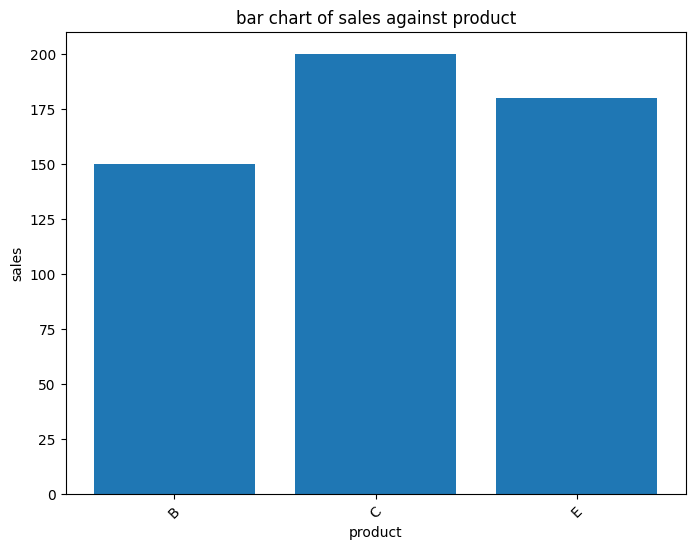

In [5]:
nlp_text = 'Find products whose sales is > 125.'

try:
    sql_query = dict_to_sql('data', find_conditions(nlp_text))
    print('Input text:', nlp_text)
    print('SQL Query:', sql_query)
    result_df = execute_sql_query(sql_query, data)
    display(result_df)

    if not result_df.empty:
        plot_chart(result_df, 'product', 'sales')

except Exception as e:
    print(f"Error executing the SQL query: {e}")